## Tacotron 2 inference code 
Edit the variables **checkpoint_path** and **text** to match yours and run the entire code to generate plots of mel outputs, alignments and audio synthesis from the generated mel-spectrogram using Griffin-Lim.

#### Import libraries and setup matplotlib

In [1]:
import sys
print(sys.executable)

/home/trinhan/anaconda3/envs/TTS/bin/python


In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import sys
sys.path.append('waveglow/')
import numpy as np
import torch

from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT, STFT
from audio_processing import griffin_lim
from train import load_model
from text import text_to_sequence
from denoiser import Denoiser

/home/trinhan/AILAB/TTS/DNNmodel/vn_tacotron2/plotting_utils.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/trinhan/anaconda3/envs/TTS/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/trinhan/anaconda3/envs/TTS/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/ipyk

In [3]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

#### Setup hparams

In [4]:
hparams = create_hparams()
hparams.sampling_rate = 22050

#### Load model from checkpoint

#### Load WaveGlow for mel2audio synthesis and denoiser

In [5]:
waveglow_path = 'waveglow_256channel.pt'
waveglow = torch.load(waveglow_path)['model']
waveglow.cuda().eval().half()
for k in waveglow.convinv:
    k.float()
denoiser = Denoiser(waveglow)

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the 

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/

In [25]:
#checkpoint_path = "tacotron2_statedict.pt"
checkpoint_path = "checkpoint_516000.dms"
checkpoint_path = "output_vi/checkpoint_5000.dms"
#checkpoint_path = "output_vi_1/checkpoint_8000"
#checkpoint_path = "vais_outdir/checkpoint_11000"
#checkpoint_path = "vais_old_nom_outdir/checkpoint_11000"
checkpoint_path = "vais_newnom_toanpretrain_outdir/checkpoint_27000"
checkpoint_path = "big_outdir_1/checkpoint_9000"
model = load_model(hparams)
#print(model)
state = torch.load(checkpoint_path)['state_dict']
#print(state)
model.load_state_dict(state)
_ = model.cuda().eval().half()

Enter Here
True
False
80
1
Embedding(96, 512)


#### Prepare text input

In [30]:
text = "bệnh nhân nguyễn hồng nhung hai mươi sáu tuổi , đang cách ly tại phòng áp lực âm bệnh viện bệnh nhiệt đới trung ương , đã hết sốt , sức khỏe ổn định"
text = "mô hình đang có chuyển biến tốt và ổn định và cũng đã được chứng minh đã chạy được vài đoạn văn bản cơ bản hơn cả bản thân trái đất hình hù"
text = "đâz la van bản ko kó hìn tháy cố địn nhưn liêu no có đọc đực ko"
text = "thời đại đất nước việt nam làm chủ nhà rồi dăm ba con vi rút nhầm nhò gì"
text = "gió đông mây bắc đổ vào làn sóng đất nước nhà nhưng vẫn không thử có được lòng con giống nhà đất nước âu cơ đại việt đại ngưu việt nam"
sequence = np.array(text_to_sequence(text, ['basic_cleaners']))[None, :]
sequence = torch.autograd.Variable(
    torch.from_numpy(sequence)).cuda().long()

#### Decode text input and plot results

Warning! Reached max decoder steps


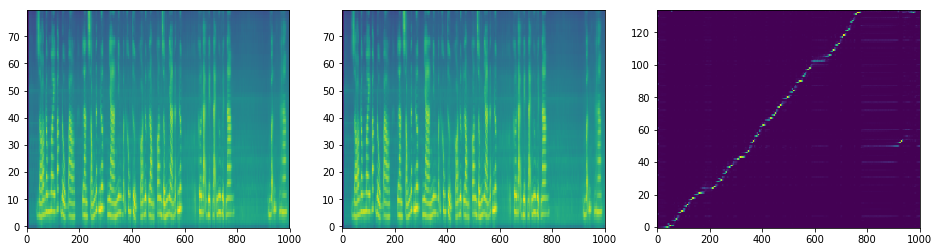

In [31]:
mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
plot_data((mel_outputs.float().data.cpu().numpy()[0],
           mel_outputs_postnet.float().data.cpu().numpy()[0],
           alignments.float().data.cpu().numpy()[0].T))

#### Synthesize audio from spectrogram using WaveGlow

In [32]:
with torch.no_grad():
    audio = waveglow.infer(mel_outputs_postnet, sigma=0.666)
ipd.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate)

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/

/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/trinhan/anaconda3/envs/TTS/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/trinhan/anaconda3/

#### (Optional) Remove WaveGlow bias

In [33]:
audio_denoised = denoiser(audio, strength=0.01)[:, 0]
ipd.Audio(audio_denoised.cpu().numpy(), rate=hparams.sampling_rate) 

In [11]:
import IPython
def new_load_model(checkpoint):
    checkpoint_path = "vais_newnom_toanpretrain_outdir/checkpoint_" + checkpoint
    state = torch.load(checkpoint_path)['state_dict']
    model.load_state_dict(state)
    _ = model.cuda().eval().half()
    

def audio_generate(text):
    
    sequence = np.array(text_to_sequence(text, ['basic_cleaners']))[None, :]
    sequence = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
    
    mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)

    with torch.no_grad():
        audio = waveglow.infer(mel_outputs_postnet, sigma=0.666)
    
    IPython.display.display(IPython.display.Audio(audio[0].data.cpu().numpy(), rate=hparams.sampling_rate))

In [12]:
""""import warnings
warnings.filterwarnings('ignore')

for text in [
    'nước',  
    'muối mặn',
    'cái nắm cửa',
    'bước tường màu trắng',
    'xanh thể hiện sự bình yên',
    'ranh giới mờ nhạt xa dần',
    'hình học không gian rất đau não',
    'tập thể dục cho cơ thể khoẻ mạnh',
    'chết người môn bóng đá chỉ ở việt nam',
    'biển đông là biển nằm ở phía đông châu Á',
    'chúng ta có quyền lựa chọn cách suy nghĩ trước mọi tình huống dù là khó khăn hay dễ đến mức ko tưởng được'
]:
    print("Text: ", text)
    for checkpoint in ['1000','8000','11000','17000']:
        new_load_model(checkpoint)
        print(checkpoint)
        audio_generate(text)"""

'"import warnings\nwarnings.filterwarnings(\'ignore\')\n\nfor text in [\n    \'nước\',  \n    \'muối mặn\',\n    \'cái nắm cửa\',\n    \'bước tường màu trắng\',\n    \'xanh thể hiện sự bình yên\',\n    \'ranh giới mờ nhạt xa dần\',\n    \'hình học không gian rất đau não\',\n    \'tập thể dục cho cơ thể khoẻ mạnh\',\n    \'chết người môn bóng đá chỉ ở việt nam\',\n    \'biển đông là biển nằm ở phía đông châu Á\',\n    \'chúng ta có quyền lựa chọn cách suy nghĩ trước mọi tình huống dù là khó khăn hay dễ đến mức ko tưởng được\'\n]:\n    print("Text: ", text)\n    for checkpoint in [\'1000\',\'8000\',\'11000\',\'17000\']:\n        new_load_model(checkpoint)\n        print(checkpoint)\n        audio_generate(text)'